<h1>Introduction</h1>

There has been a change in the Credit Card APR. We want to launch a campaign that targets customers with low credit card activities for advert in order to make them use their credit card with our company more. A credit card dataset with 18 features has been provided. 

The first task is to understand the data using exploratory data analysis and Data visualisation.
After gaining some insight about the domain of the dataset. The Density based spatial clustering of applications with noise (DBSCAN) algorithm will be used to target customers who use their credit card less frequently for the new APR campaign.

If there is a steady inflow of the credit card data from a source this algorithm can be applied as a Data mining tools to target customers with low credit card activities.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('./CC GENERAL.csv')

<h1>Dataset Dictionary</h1>

Following is the Data Dictionary for Credit Card dataset :- 

CUSTID : Identification of Credit Card holder (Categorical)\
BALANCE : Balance amount left in their account to make purchases ( \
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)\
PURCHASES : Amount of purchases made from account\
ONEOFFPURCHASES : Maximum purchase amount done in one-go\
INSTALLMENTSPURCHASES : Amount of purchase done in installment\
CASHADVANCE : Cash in advance given by the user\
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)\
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)\
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)\
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid\
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"\
PURCHASESTRX : Numbe of purchase transactions made\
CREDITLIMIT : Limit of Credit Card for user\
PAYMENTS : Amount of Payment done by user\
MINIMUM_PAYMENTS : Minimum amount of payments made by user\
PRCFULLPAYMENT : Percent of full payment paid by user\
TENURE : Tenure of credit card service for user\



In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

<h1> Missing Values</h1>
Before we can derive some insight from our data using exploratory data analysis. we have to check and do something with the missing values so that we can get accurate insight from our eda

In [4]:
missing_values = df.isna().sum().to_frame()
missing_values = missing_values.rename(columns= {0: 'missing_values'})
missing_values['% of total'] = (missing_values['missing_values'] / df.shape[0]).round(2)
missing_values

missing_values  % of total
CUST_ID                                        0        0.00
BALANCE                                        0        0.00
BALANCE_FREQUENCY                              0        0.00
PURCHASES                                      0        0.00
ONEOFF_PURCHASES                               0        0.00
INSTALLMENTS_PURCHASES                         0        0.00
CASH_ADVANCE                                   0        0.00
PURCHASES_FREQUENCY                            0        0.00
ONEOFF_PURCHASES_FREQUENCY                     0        0.00
PURCHASES_INSTALLMENTS_FREQUENCY               0        0.00
CASH_ADVANCE_FREQUENCY                         0        0.00
CASH_ADVANCE_TRX                               0        0.00
PURCHASES_TRX                                  0        0.00
CREDIT_LIMIT                                   1        0.00
PAYMENTS                                       0        0.00
MINIMUM_PAYMENTS                             313        0.03
PRC_FULL_PAYMENT                               0        0.00
TENURE                                         0        0.00

it can be observed from the table above that only 0.03% of the minimum_payments column and 1 credit_limit entry is missing. Although, the percentage of the missing data is really small compared to the total number of enteries in the dataset. it can be considered insignificant but due to the nature of the dataset we are working with in this excerise. Every entry or Row is a customer. Therefore, missing_values should be replaced with column mean.

In [5]:
#replace missing values with column mean
df['MINIMUM_PAYMENTS'].replace(np.nan, np.mean(df['MINIMUM_PAYMENTS']), inplace=True)
df['CREDIT_LIMIT'].replace(np.nan, np.mean(df['CREDIT_LIMIT']), inplace=True)

In [113]:
#check if missing values have been fixed
missing_values = df.isna().sum().to_frame()
missing_values = missing_values.rename(columns= {0: 'missing_values'})
missing_values['% of total'] = (missing_values['missing_values'] / df.shape[0]).round(2)
missing_values

missing_values  % of total
CUST_ID                                        0         0.0
BALANCE                                        0         0.0
BALANCE_FREQUENCY                              0         0.0
PURCHASES                                      0         0.0
ONEOFF_PURCHASES                               0         0.0
INSTALLMENTS_PURCHASES                         0         0.0
CASH_ADVANCE                                   0         0.0
PURCHASES_FREQUENCY                            0         0.0
ONEOFF_PURCHASES_FREQUENCY                     0         0.0
PURCHASES_INSTALLMENTS_FREQUENCY               0         0.0
CASH_ADVANCE_FREQUENCY                         0         0.0
CASH_ADVANCE_TRX                               0         0.0
PURCHASES_TRX                                  0         0.0
CREDIT_LIMIT                                   0         0.0
PAYMENTS                                       0         0.0
MINIMUM_PAYMENTS                               0         0.0
PRC_FULL_PAYMENT                               0         0.0
TENURE                                         0         0.0

<h1>EDA</h1>
Using exploratory data analysis to understand the domain of the dataset. we will also checked for correlation and understand how one feature affects another

In [7]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [8]:
df.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

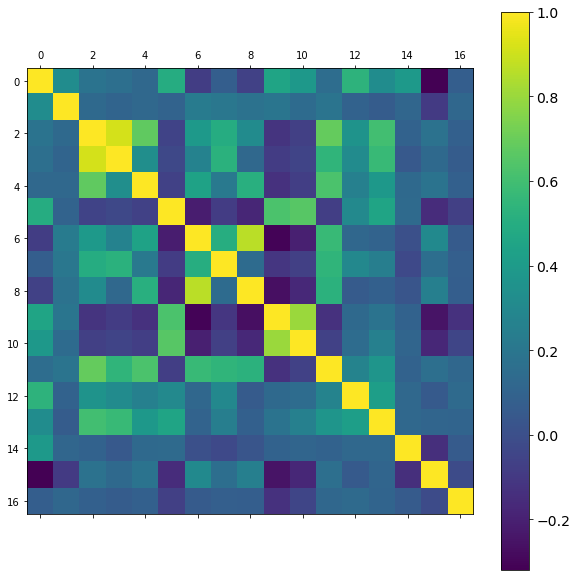

In [9]:
#plot correlation matrix
f=plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [128]:
cor = df.corr().unstack().sort_values().drop_duplicates()
cor1 = pd.DataFrame(cor, columns=['correlation'])

In [129]:
cor1.head(10)

correlation
BALANCE                PRC_FULL_PAYMENT                    -0.318959
CASH_ADVANCE_FREQUENCY PURCHASES_FREQUENCY                 -0.308478
                       PURCHASES_INSTALLMENTS_FREQUENCY    -0.262958
PRC_FULL_PAYMENT       CASH_ADVANCE_FREQUENCY              -0.249773
PURCHASES_FREQUENCY    CASH_ADVANCE                        -0.215507
CASH_ADVANCE_TRX       PURCHASES_FREQUENCY                 -0.203478
CASH_ADVANCE           PURCHASES_INSTALLMENTS_FREQUENCY    -0.177070
PRC_FULL_PAYMENT       CASH_ADVANCE_TRX                    -0.169784
CASH_ADVANCE_TRX       PURCHASES_INSTALLMENTS_FREQUENCY    -0.169207
CASH_ADVANCE           PRC_FULL_PAYMENT                    -0.152935

In [133]:
cor1.tail(35)

correlation
ONEOFF_PURCHASES                 CREDIT_LIMIT                   0.319721
BALANCE                          BALANCE_FREQUENCY              0.322412
PAYMENTS                         BALANCE                        0.322802
INSTALLMENTS_PURCHASES           ONEOFF_PURCHASES               0.330622
PURCHASES                        CREDIT_LIMIT                   0.356959
PURCHASES_TRX                    PAYMENTS                       0.370832
INSTALLMENTS_PURCHASES           PAYMENTS                       0.384084
CASH_ADVANCE_TRX                 BALANCE                        0.385152
PURCHASES                        PURCHASES_FREQUENCY            0.393017
MINIMUM_PAYMENTS                 BALANCE                        0.394282
PAYMENTS                         CREDIT_LIMIT                   0.421852
PURCHASES_FREQUENCY              INSTALLMENTS_PURCHASES         0.442418
CASH_ADVANCE_FREQUENCY           BALANCE                        0.449218
CASH_ADVANCE                     PAYMENTS                       0.453238
BALANCE                          CASH_ADVANCE                   0.496692
PURCHASES                        ONEOFF_PURCHASES_FREQUENCY     0.498430
PURCHASES_FREQUENCY              ONEOFF_PURCHASES_FREQUENCY     0.501343
PURCHASES_INSTALLMENTS_FREQUENCY INSTALLMENTS_PURCHASES         0.511351
ONEOFF_PURCHASES_FREQUENCY       ONEOFF_PURCHASES               0.524891
PURCHASES_INSTALLMENTS_FREQUENCY PURCHASES_TRX                  0.529975
CREDIT_LIMIT                     BALANCE                        0.531267
PURCHASES_TRX                    ONEOFF_PURCHASES_FREQUENCY     0.544869
                                 ONEOFF_PURCHASES               0.545523
PAYMENTS                         ONEOFF_PURCHASES               0.567292
PURCHASES_FREQUENCY              PURCHASES_TRX                  0.568430
PAYMENTS                         PURCHASES                      0.603264
PURCHASES_TRX                    INSTALLMENTS_PURCHASES         0.628108
CASH_ADVANCE                     CASH_ADVANCE_FREQUENCY         0.628522
                                 CASH_ADVANCE_TRX               0.656498
INSTALLMENTS_PURCHASES           PURCHASES                      0.679896
PURCHASES_TRX                    PURCHASES                      0.689561
CASH_ADVANCE_TRX                 CASH_ADVANCE_FREQUENCY         0.799561
PURCHASES_INSTALLMENTS_FREQUENCY PURCHASES_FREQUENCY            0.862934
ONEOFF_PURCHASES                 PURCHASES                      0.916845
BALANCE                          BALANCE                        1.000000

Most features with high correlation are positively correlated. Knowing the features that are highly correlated will make it easier to choose which features to plot. Also the features which are highly correlated don't have to be dropped since a Clustering algorithm will be used.

In [10]:
#dataframe grouped by tenure
DF_TENURE = df.groupby('TENURE').mean()

In [11]:
#plot apie chat of how many customers in each tenure
label, freq = np.unique(df.TENURE.values, return_counts=True)

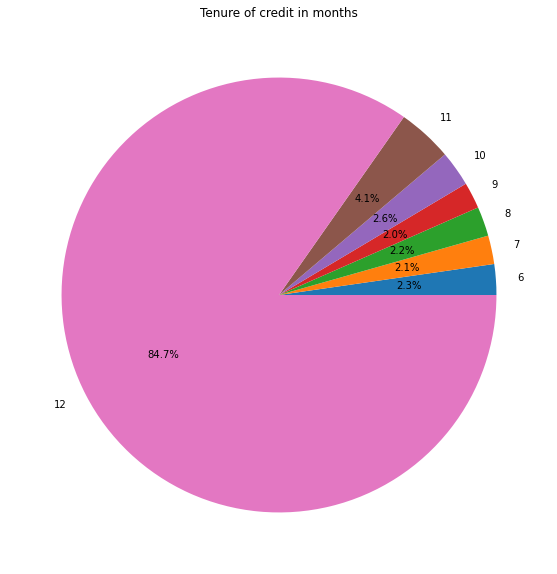

In [12]:
plt.figure(figsize=(10,10))
plt.title('Tenure of credit in months')
plt.pie(freq, labels=label, autopct='%1.1f%%')
plt.show()

From the pie chart it can be observe that 85% of customers have a 12 months credit card tenure and the minimium tenure on the credit card is 6 months and only 1.9% of the customer have a 9 months tenure

In [13]:
tenure_df = df.groupby('TENURE').agg('mean')\
                    .reset_index()\
                    .sort_values(by='TENURE', ascending=False)
tenure_df

TENURE      BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
6      12  1619.158166           0.888965  1088.192402        640.490534   
5      11  1641.770893           0.870486   571.222411        370.300712   
4      10  1251.955773           0.792373   676.631271        407.238898   
3       9  1098.752149           0.784127   540.138171        302.211486   
2       8  1127.963470           0.783163   468.858929        305.398980   
1       7  1003.800362           0.803759   424.559421        244.051947   
0       6  1095.890702           0.791667   443.941667        266.916863   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6              448.010364    908.707528             0.506087   
5              200.921699   1363.252071             0.360399   
4              269.591525   1303.918006             0.390254   
3              239.469543   1470.785130             0.406349   
2              163.459949   1361.858390             0.405612   
1              180.507474   1295.632053             0.430075   
0              177.171863   1438.554796             0.463235   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6                    0.214300                          0.381406   
5                    0.148443                          0.231631   
4                    0.141525                          0.262712   
3                    0.109206                          0.296508   
2                    0.140944                          0.273597   
1                    0.123308                          0.292481   
0                    0.142157                          0.301471   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6                0.124044          3.060390      16.129351   4693.331329   
5                0.172105          4.961644       7.857534   4141.232877   
4                0.181356          4.076271       7.826271   3871.610169   
3                0.205714          4.582857       6.571429   2977.904762   
2                0.189413          4.096939       6.250000   2973.724490   
1                0.219549          3.700000       5.668421   2567.631579   
0                0.236928          3.852941       5.691176   3009.874752   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
6  1853.606676        911.619050          0.153426  
5  1568.695623        970.856785          0.118375  
4  1127.220569        485.388514          0.169396  
3   967.757363        566.185678          0.169778  
2   842.787393        457.078519          0.154094  
1   793.778037        441.975644          0.135363  
0   636.886258        389.068660          0.212500

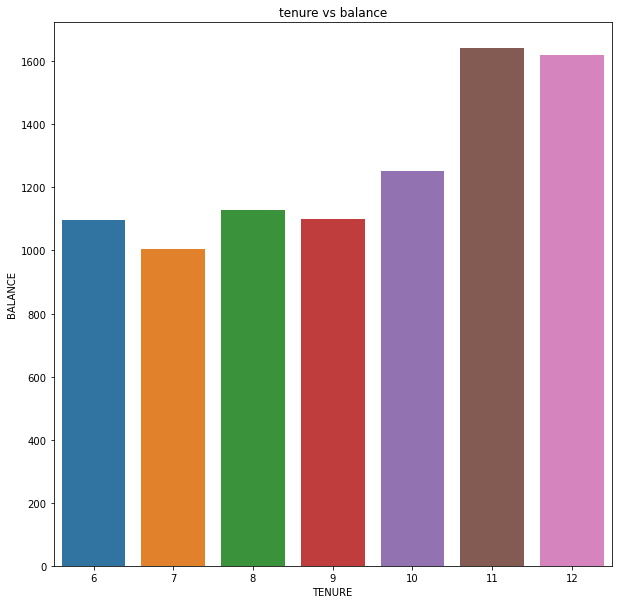

In [14]:
plt.figure(figsize=(10, 10))
plt.title('tenure vs balance')
sns.barplot(x='TENURE', y='BALANCE', data=tenure_df)
plt.show()

It can be establish from the above barchart that customers with lower tenure tend to have lower balance. Further EDA can be done to understand if the tenure of credit card service for users also affect their credit limit.

In [15]:
fig = px.bar(tenure_df, x='TENURE', y='CREDIT_LIMIT', title='TENURE VS CREDIT LIMIT', color='TENURE')
fig.show()

In [134]:
fig = px.bar(tenure_df, x='TENURE', y='PURCHASES', title='TENURE VS PURCHASES', color='TENURE')
fig.show()

Customers with longer tenure tend to have a higher credit limit and they tend to make higher purchase

In [16]:
#drop customer id column
x = df.drop(['CUST_ID'], axis=1)

<h1>PCA</h1>
The dimensionality curse can be an headache when trying to visualize a dataset with alot of features. Using PCA for dimensionality reduction the dimension of the dataset can be reduced to a visualizable dimension. It is a general rule of thumb that the explained variance for n_component of the pca must add up to atleast 0.8 or 80%

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=3)

In [19]:
df_pca = pca.fit_transform(x)

In [20]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, ))

Variance of each component: [0.47529109 0.17778772 0.13977555]

 Total Variance Explained: 79


The total variance Explaine is 0.79 or 79%. Since the lower the number of component the easier it is to visualize the dataset. the number of component can be used 

In [21]:
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2', 'PCA3'])

In [22]:
df_pca

PCA1         PCA2         PCA3
0    -4326.383956   921.566884   183.708365
1     4118.916676 -2432.846347  2369.969306
2     1497.907660 -1997.578692 -2125.631345
3     1394.548556 -1488.743450 -2431.799668
4    -3743.351874   757.342659   512.476474
...           ...          ...          ...
8945 -4208.357938  1122.443274   136.926040
8946 -4123.924001   951.683803   634.880178
8947 -4379.444202   911.504566   101.257199
8948 -4791.117744  1032.540944   358.038359
8949 -3623.702749  1555.134769   -28.368008

[8950 rows x 3 columns]

<h1> DBSCAN</h1>

Using the Density-Based Spatial Clustering of Applications with Noise. This alogorithm finds core samples of high density and expands clusters from them. 
it assign a number from 0 along the positive number line to each clusters. The noise are denoted with -1.
The DBSCAN algorithm bassically requires 2 parameters:

<b>eps:</b> specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors. Using the k-distance plot to estimate the value of eps\
<b>minPoints:</b> the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.\


It starts with an arbitrary starting point that has not been visited. This point's ε-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized ε-environment of a different point and hence be made part of a cluster.

If a point is found to be a dense part of a cluster, its ε-neighborhood is also part of that cluster. Hence, all points that are found within the ε-neighborhood are added, as is their own ε-neighborhood when they are also dense. This process continues until the density-connected cluster is completely found. Then, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise.


In [23]:
from sklearn.neighbors import NearestNeighbors

In [24]:
#using the  k-distance plot to estimate eps
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df_pca)

In [25]:
distances, indices = neighbors_fit.kneighbors(df_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
px.line(distances)

In [99]:
clustering = DBSCAN(eps=2100, min_samples=6).fit(df_pca)

In [100]:
labels = clustering.labels_

In [101]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 180


In [102]:
#Assign a cluster to each variable 
target = pd.Series(labels, name='target')
new_p = pd.concat([df_pca, target], axis=1)

In [103]:
#dataset reduced to a 3 dimension using PCA
new_p

PCA1         PCA2         PCA3  target
0    -4326.383956   921.566884   183.708365       0
1     4118.916676 -2432.846347  2369.969306       0
2     1497.907660 -1997.578692 -2125.631345       0
3     1394.548556 -1488.743450 -2431.799668       0
4    -3743.351874   757.342659   512.476474       0
...           ...          ...          ...     ...
8945 -4208.357938  1122.443274   136.926040       0
8946 -4123.924001   951.683803   634.880178       0
8947 -4379.444202   911.504566   101.257199       0
8948 -4791.117744  1032.540944   358.038359       0
8949 -3623.702749  1555.134769   -28.368008       0

[8950 rows x 4 columns]

In [104]:
fig = px.scatter_3d(new_p, x='PCA1', y='PCA2', z='PCA3', color='target', title='Cluster')
fig.show()

The result of the dbscan on the dataset will be analysed for insight to understand what each cluster represent. From the result it can be observed that there two cluster a very large one and a smaller one. The noise are also denoted by -1.\
The result of the DBSCAN should be merged with the dataset as a new column named target.

In [105]:
new_df = pd.concat([df, target], axis=1)

In [106]:
new_df['target'].value_counts()

 0    8758
-1     180
 1       6
 2       6
Name: target, dtype: int64

In [143]:
target_df = new_df.groupby('target').agg('mean')\
                    .reset_index()\
                    .sort_values(by='target', ascending=True)
target_df

target      BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0      -1  5667.150931           0.919580   7928.968389       5398.602667   
1       0  1479.235685           0.876243    853.975045        487.618268   
2       1  1087.995321           0.984849  11703.465000       9897.783333   
3       2  3381.406446           1.000000    355.786667        103.083333   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             2530.487944   4947.867397             0.660825   
1              366.661028    898.483445             0.486495   
2             1805.681667    145.930512             1.000000   
3              252.703333     81.121733             0.494949   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.456449                          0.523988   
1                    0.196782                          0.360900   
2                    1.000000                          0.666667   
3                    0.069444                          0.439394   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.236149          9.416667      60.344444  12508.055556   
1                0.133206          3.125485      13.702786   4329.860993   
2                0.041667          1.000000     109.833333   5666.666667   
3                0.027778          0.500000      20.500000   3158.333333   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0  14306.150340       6157.877053          0.220714  11.827778  
1   1468.884963        738.188293          0.152090  11.510391  
2  11609.598115        308.439538          0.669444  12.000000  
3    396.386224      26554.495677          0.000000  11.833333

In [149]:
#drop noise row
target = target_df.drop(0)
target['target'].replace([0, 1, 2], ['CLUSTER_1', 'CLUSTER_2', 'CLUSTER_3'], inplace=True)
target

target      BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
1  CLUSTER_1  1479.235685           0.876243    853.975045        487.618268   
2  CLUSTER_2  1087.995321           0.984849  11703.465000       9897.783333   
3  CLUSTER_3  3381.406446           1.000000    355.786667        103.083333   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1              366.661028    898.483445             0.486495   
2             1805.681667    145.930512             1.000000   
3              252.703333     81.121733             0.494949   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                    0.196782                          0.360900   
2                    1.000000                          0.666667   
3                    0.069444                          0.439394   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                0.133206          3.125485      13.702786   4329.860993   
2                0.041667          1.000000     109.833333   5666.666667   
3                0.027778          0.500000      20.500000   3158.333333   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
1   1468.884963        738.188293          0.152090  11.510391  
2  11609.598115        308.439538          0.669444  12.000000  
3    396.386224      26554.495677          0.000000  11.833333

In [153]:
fig = px.bar(target, x='target', y='BALANCE', color='target', title='Target vs Balance')
fig.show()

Cluster 3 has the highest balance of with a little above 3000 while cluster 1 and 2 have their balance below 1500.

In [154]:
fig = px.bar(target, x='target', y='CREDIT_LIMIT', color='target', title='Target vs Credit limit')
fig.show()

Cluster 3 have their credit limit a little over 3000 having the credit balance and credit limit at almost the same thing can be interpreted has cluster 3 not making alot of transaction with their credit card. This can be confirmed with the payement or purchase

cluster 2 has the highest credit limit with 5666 and a balnce of 1087. customers in this cluster have a purchase in excess of over 4000.

Cluster 1 has a credit limit of 4329 and a balance of 1479. customers in this cluster have spent less than 3000 on their credit card.

In [160]:
fig = px.bar(target, x='target', y='PAYMENTS', color='target', title='Target vs Payments')
fig.show()

In [161]:
fig = px.bar(target, x='target', y='PURCHASES', color='target', Title='Target vs Purchases')
fig.show()

In [164]:
fig = px.bar(target, x='target',
             y='PRC_FULL_PAYMENT', 
             color='target',
            title='Target vs percentage of full payment')
fig.show()

In [162]:
fig = px.bar(target, x='target', y='PURCHASES_FREQUENCY', 
             color='target', 
             title='Target vs Purchases frequency')
fig.show()

customers in cluster 3 also  make less payments this as a result of their purchases and less activities on their credit card. customers in cluster 1 also make purchase less fequently but they spend more compared to customer in cluster 3. 
Customers in cluster 2 use their credit card very often and are heavy users of their credit card. They have the highest credit limit, credit balance, make the highest purchase, make the highest payment and maintain a high balance. S

<h1>Recommendation</h1>

Since the objective is to target customers with lower activities on their credit card. The priority of the campaign should focus on customers in cluster 3 then customers in cluster 1 for a targeted advertisment.
Customers in cluster 3 have very low activities on their credit card. They might have a credit card with other companies or rely on debit cards for their transaction. A target campaign of a low APR credit card can increase their credit card activities.